In [3]:
# Import the dependencies.
# import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time

# Import the API key.
from config import weather_api_key

from datetime import datetime

In [4]:
# Use the citipy module to determine city based on latitude and longitu

from citipy import citipy


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [8]:
# Import the requests library.
import requests

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [11]:
city_weather = requests.get(city_url)
city_weather.status_code

200

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":701,"main":"Mist","description":"mist","icon":"50d"}],"base":"stations","main":{"temp":56.12,"feels_like":55.9,"temp_min":54.14,"temp_max":57.72,"pressure":1014,"humidity":95},"visibility":3219,"wind":{"speed":14.97,"deg":20},"clouds":{"all":100},"dt":1664986197,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1664966731,"sunset":1665008372},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 56.12,
  'feels_like': 55.9,
  'temp_min': 54.14,
  'temp_max': 57.72,
  'pressure': 1014,
  'humidity': 95},
 'visibility': 3219,
 'wind': {'speed': 14.97, 'deg': 20},
 'clouds': {'all': 100},
 'dt': 1664986197,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1664966731,
  'sunset': 1665008372},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 56.12,
  'feels_like': 55.9,
  'temp_min': 54.14,
  'temp_max': 57.72,
  'pressure': 1014,
  'humidity': 95},
 'visibility': 3219,
 'wind': {'speed': 14.97, 'deg': 20},
 'clouds': {'all': 100},
 'dt': 1664986197,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1664966731,
  'sunset': 1665008372},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data.
boston_data = city_weather.json()


In [18]:
boston_data["sys"]["country"]

'US'

In [19]:
boston_data["dt"]

1664986197

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 57.72 95 100 14.97


In [21]:
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-10-05 16:09:57'

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-cartier
Processing Record 2 of Set 1 | fort-shevchenko
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | veere
Processing Record 9 of Set 1 | tomatlan
Processing Record 10 of Set 1 | nizhnevartovsk
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | hagere selam
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | seoul
Processing Record 18 of Set 1 | aklavik
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | jacobina
Processing 

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port-Cartier,50.0334,-66.8654,53.74,73,92,2.24,CA,2022-10-05 16:12:56
1,Fort-Shevchenko,44.5086,50.2630,67.93,57,43,6.15,KZ,2022-10-05 16:12:56
2,Butaritari,3.0707,172.7902,81.70,70,29,19.84,KI,2022-10-05 16:12:57
3,Busselton,-33.6500,115.3333,52.43,59,62,10.27,AU,2022-10-05 16:12:57
4,Vaini,-21.2000,-175.2000,75.36,94,40,4.61,TO,2022-10-05 16:12:57
5,Hermanus,-34.4187,19.2345,63.81,71,1,11.74,ZA,2022-10-05 16:12:58
6,Pisco,-13.7000,-76.2167,63.01,77,100,6.91,PE,2022-10-05 16:12:58
7,Veere,51.5483,3.6667,64.40,76,100,25.32,NL,2022-10-05 16:12:58
8,Tomatlan,19.9333,-105.2500,82.38,73,46,0.56,MX,2022-10-05 16:12:59
9,Nizhnevartovsk,60.9344,76.5531,35.02,100,0,4.00,RU,2022-10-05 16:10:19


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port-Cartier,CA,2022-10-05 16:12:56,50.0334,-66.8654,53.74,73,92,2.24
1,Fort-Shevchenko,KZ,2022-10-05 16:12:56,44.5086,50.2630,67.93,57,43,6.15
2,Butaritari,KI,2022-10-05 16:12:57,3.0707,172.7902,81.70,70,29,19.84
3,Busselton,AU,2022-10-05 16:12:57,-33.6500,115.3333,52.43,59,62,10.27
4,Vaini,TO,2022-10-05 16:12:57,-21.2000,-175.2000,75.36,94,40,4.61


In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Get today's date in seconds.
today = time.time()
today

1664987467.135011

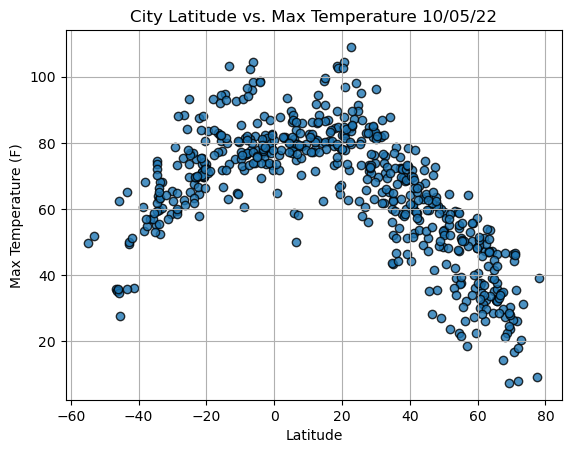

In [33]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../Weather_Analysis/weather_data/Fig1.png")

# Show plot.
plt.show()

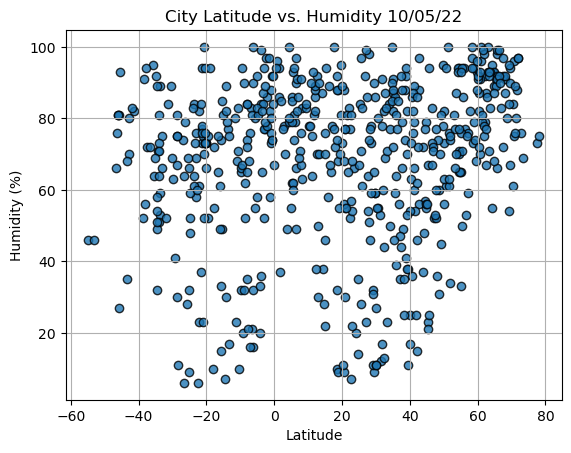

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../Weather_Analysis/weather_data/Fig2.png")
# Show plot.
plt.show()

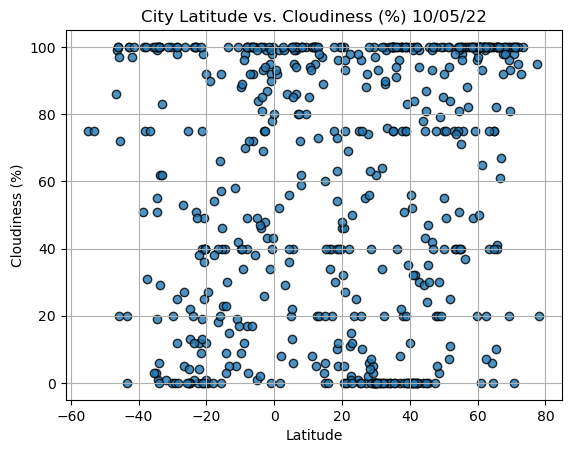

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../Weather_Analysis/weather_data/Fig3.png")
# Show plot.
plt.show()

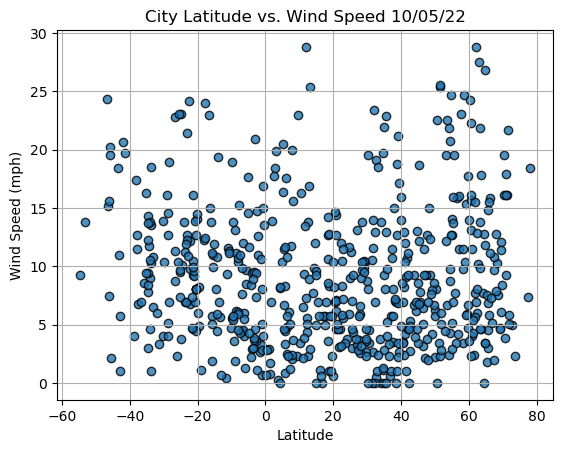

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("../Weather_Analysis/weather_data/Fig4.png")
# Show plot.
plt.show()

Comment